<a href="https://colab.research.google.com/github/athabrani/BTCUSD-Scraper/blob/main/BTC_USD_Scraping_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping from 2023

In [1]:
import requests
import pandas as pd
import time
import datetime
from google.colab import drive

drive.mount('/content/drive')

# === Rentang waktu ===
start_date = "2023-02-11 23:00:00"
end_date = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Ubah ke UNIX timestamp
start_timestamp = int(time.mktime(time.strptime(start_date, "%Y-%m-%d %H:%M:%S")))
end_timestamp = int(time.mktime(time.strptime(end_date, "%Y-%m-%d %H:%M:%S")))

print(f"Scraping data dari {start_date} sampai {end_date} ...")

# === ambil data per batch ===
def fetch_ohlc(start, end, step=3600, limit=1000):
    url = "https://www.bitstamp.net/api/v2/ohlc/btcusd/"
    params = {
        "step": step,
        "limit": limit,
        "start": start,
        "end": end
    }
    response = requests.get(url, params=params, timeout=30)
    response.raise_for_status()
    return response.json()["data"]["ohlc"]

# === Loop untuk ambil data bertahap ===
all_data = []
current_start = start_timestamp
batch = 0

while current_start < end_timestamp:
    current_end = current_start + (3600 * 1000)
    if current_end > end_timestamp:
        current_end = end_timestamp

    try:
        ohlc_data = fetch_ohlc(current_start, current_end)
        all_data.extend(ohlc_data)
        print(f"Batch {batch+1}: {len(ohlc_data)} data diambil ({time.strftime('%Y-%m-%d', time.localtime(current_start))} → {time.strftime('%Y-%m-%d', time.localtime(current_end))})")
    except Exception as e:
        print(f"Gagal batch {batch+1}: {e}")
        time.sleep(5)

    # Geser rentang waktu
    current_start = current_end
    batch += 1
    time.sleep(1)

# === Simpan ke DataFrame ===
df = pd.DataFrame(all_data)
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
df = df.astype(float, errors="ignore")

print("\n Preview data:")
print(df.head())

# === Simpan ke Google Drive ===
save_path = "/content/drive/MyDrive/Big Data Dataset/bitcoin_bitstamp_ohlc_2023hourly.csv"
df.to_csv(save_path, index=False)
print(f"\n Data berhasil disimpan ke: {save_path}")


Mounted at /content/drive
Scraping data dari 2023-02-11 23:00:00 sampai 2025-11-09 08:13:28 ...
Batch 1: 1000 data diambil (2023-02-11 → 2023-03-25)
Batch 2: 1000 data diambil (2023-03-25 → 2023-05-06)
Batch 3: 1000 data diambil (2023-05-06 → 2023-06-16)
Batch 4: 1000 data diambil (2023-06-16 → 2023-07-28)
Batch 5: 1000 data diambil (2023-07-28 → 2023-09-08)
Batch 6: 1000 data diambil (2023-09-08 → 2023-10-19)
Batch 7: 1000 data diambil (2023-10-19 → 2023-11-30)
Batch 8: 1000 data diambil (2023-11-30 → 2024-01-11)
Batch 9: 1000 data diambil (2024-01-11 → 2024-02-21)
Batch 10: 1000 data diambil (2024-02-21 → 2024-04-03)
Batch 11: 1000 data diambil (2024-04-03 → 2024-05-15)
Batch 12: 1000 data diambil (2024-05-15 → 2024-06-25)
Batch 13: 1000 data diambil (2024-06-25 → 2024-08-06)
Batch 14: 1000 data diambil (2024-08-06 → 2024-09-17)
Batch 15: 1000 data diambil (2024-09-17 → 2024-10-28)
Batch 16: 1000 data diambil (2024-10-28 → 2024-12-09)
Batch 17: 1000 data diambil (2024-12-09 → 2025-01

/tmp/ipython-input-3736656087.py:57: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")



 Preview data:
            timestamp     open     high      low    close     volume
0 2023-02-12 00:00:00  21868.0  21884.0  21814.0  21821.0  14.005166
1 2023-02-12 01:00:00  21821.0  21849.0  21794.0  21813.0  11.231465
2 2023-02-12 02:00:00  21811.0  21825.0  21773.0  21824.0  49.379005
3 2023-02-12 03:00:00  21822.0  21826.0  21787.0  21787.0  17.202122
4 2023-02-12 04:00:00  21787.0  21793.0  21770.0  21787.0  16.750288

 Data berhasil disimpan ke: /content/drive/MyDrive/Big Data Dataset/bitcoin_bitstamp_ohlc_2023hourly.csv


# Scraping realtime

/tmp/ipython-input-2677278438.py:28: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
/tmp/ipython-input-2677278438.py:59: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = combined_df.set_index('timestamp').resample('1H').agg({


Data per menit disimpan ke: /content/drive/MyDrive/Big Data Dataset/bitstamp_ohlc_realtime.csv
Data per jam disimpan ke: /content/drive/MyDrive/Big Data Dataset/bitstamp_ohlc_hourly.csv

Cuplikan Data Per Jam Terbaru:


,timestamp,open,high,low,close,volume
7,2025-11-09 06:00:00,101907.0,101940.0,101684.0,101710.0,7.596489
8,2025-11-09 07:00:00,101709.0,101947.0,101663.0,101941.0,62.529035
9,2025-11-09 08:00:00,101945.0,101960.0,101880.0,101960.0,2.994621


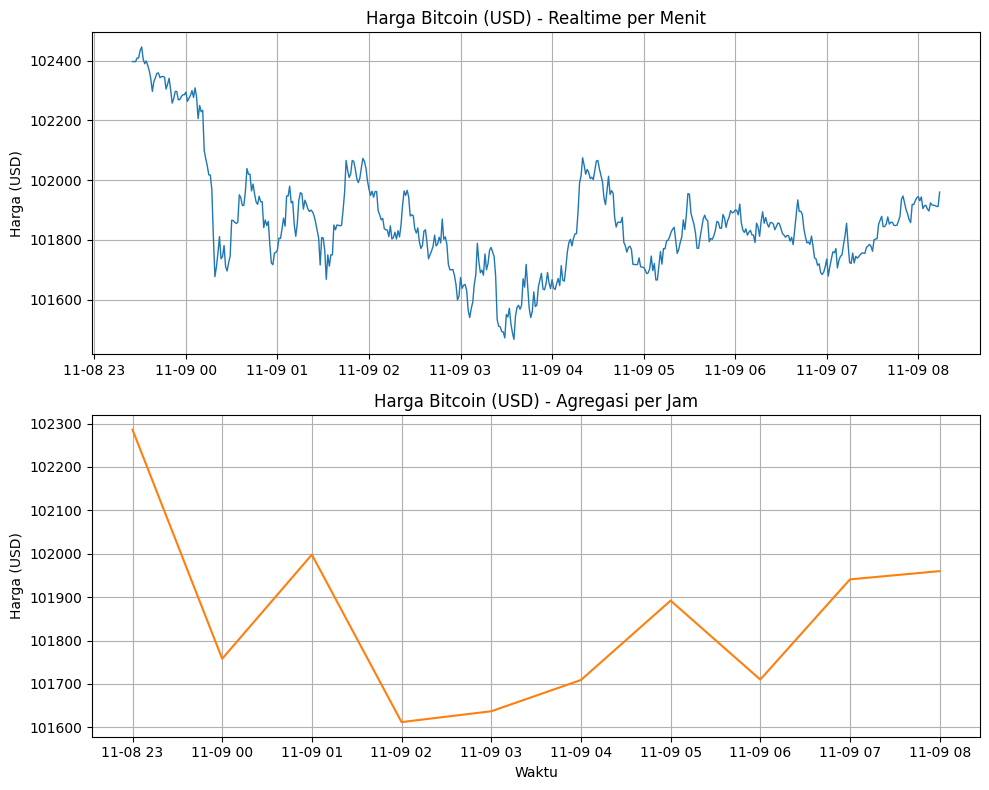

⏳ Menunggu 60 detik untuk update berikutnya...


 Pengambilan data dihentikan oleh pengguna.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# === Import Library ===
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display
import os

# === 3. Path Penyimpanan ===
raw_path = '/content/drive/MyDrive/Big Data Dataset/bitstamp_ohlc_realtime.csv'
hourly_path = '/content/drive/MyDrive/Big Data Dataset/bitstamp_ohlc_hourly.csv'

# === 4. Fungsi untuk Ambil Data dari API Bitstamp ===
def get_bitcoin_data():
    url = "https://www.bitstamp.net/api/v2/ohlc/btcusd/"
    params = {
        "step": 60,   # interval 60 detik (1 menit)
        "limit": 500   # ambil 60 data terakhir (1 jam)
    }
    response = requests.get(url, params=params, timeout=15)
    response.raise_for_status()
    data = response.json()

    df = pd.DataFrame(data['data']['ohlc'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    df = df.astype({
        'open': float,
        'high': float,
        'low': float,
        'close': float,
        'volume': float
    })
    return df

# === 5. Inisialisasi Dataset ===
if os.path.exists(raw_path):
    historical_df = pd.read_csv(raw_path)
    historical_df['timestamp'] = pd.to_datetime(historical_df['timestamp'])
else:
    historical_df = pd.DataFrame()

# === 6. Loop Realtime ===
print("🚀 Mulai pengambilan data realtime Bitcoin dari Bitstamp...\n")

while True:
    try:
        clear_output(wait=True)
        df = get_bitcoin_data()

        # Gabungkan dan hilangkan duplikat
        combined_df = pd.concat([historical_df, df]).drop_duplicates(subset=['timestamp']).sort_values('timestamp')
        combined_df.to_csv(raw_path, index=False)
        historical_df = combined_df.copy()

        # === 7. Sampling per jam (OHLC + total volume) ===
        hourly_df = combined_df.set_index('timestamp').resample('1H').agg({
            'open': 'first',
            'high': 'max',
            'low': 'min',
            'close': 'last',
            'volume': 'sum'
        }).dropna().reset_index()
        hourly_df.to_csv(hourly_path, index=False)

        # === 8. Tampilkan output ===
        print(f"Data per menit disimpan ke: {raw_path}")
        print(f"Data per jam disimpan ke: {hourly_path}\n")

        print("Cuplikan Data Per Jam Terbaru:")
        display(hourly_df.tail(3))

        # === 9. Visualisasi ===
        fig, axs = plt.subplots(2, 1, figsize=(10, 8))

        # Grafik realtime
        axs[0].plot(combined_df['timestamp'], combined_df['close'], color='tab:blue', linewidth=1)
        axs[0].set_title("Harga Bitcoin (USD) - Realtime per Menit")
        axs[0].set_ylabel("Harga (USD)")
        axs[0].grid(True)

        # Grafik agregasi per jam
        axs[1].plot(hourly_df['timestamp'], hourly_df['close'], color='tab:orange', linewidth=1.5)
        axs[1].set_title("Harga Bitcoin (USD) - Agregasi per Jam")
        axs[1].set_xlabel("Waktu")
        axs[1].set_ylabel("Harga (USD)")
        axs[1].grid(True)

        plt.tight_layout()
        plt.show()

        print("⏳ Menunggu 60 detik untuk update berikutnya...\n")
        time.sleep(60)

    except KeyboardInterrupt:
        print("\n Pengambilan data dihentikan oleh pengguna.")
        break

    except Exception as e:
        print(f"Terjadi error: {e}")
        print("Mencoba lagi dalam 30 detik...\n")
        time.sleep(30)